In [6]:
%cd ..

/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT2/Retail_Analytics/American_Retail_Sales/notebooks


In [7]:
import pandas as pd
import numpy as np

In [ ]:

data = pd.read_csv('../data/processed/final_merged_events.csv', low_memory=False)

In [2]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,date,units_sold,wm_yr_wk,sell_price,sales,event_name,event_count
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-01-29,3,11101,2.0,6.0,NoEvent,0.0
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-01-30,0,11101,2.0,0.0,NoEvent,0.0
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-01-31,0,11101,2.0,0.0,NoEvent,0.0
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-02-01,1,11101,2.0,2.0,NoEvent,0.0
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,2011-02-02,4,11101,2.0,8.0,NoEvent,0.0


In [4]:
import pandas as pd

store_names = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']


# Group by 'date' and sum the 'sales' column for all stores
daily_sales = data.groupby('date')['sales'].sum().reset_index()

daily_sales['date'] = pd.to_datetime(daily_sales['date'])

# Define the path where you want to save the CSV file

#daily_sales.set_index('date', inplace=True)
#daily_sales = daily_sales.resample('D').sum()  #


In [165]:
duplicate_dates = daily_sales[daily_sales.duplicated()]
print(duplicate_dates)

Empty DataFrame
Columns: [date, sales]
Index: []


In [126]:
daily_sales.head()

,date,sales
0,2011-01-29,81650.61
1,2011-01-30,78970.57
2,2011-01-31,57706.91
3,2011-02-01,60761.20
4,2011-02-02,46959.95


In [20]:
test_data = pd.read_csv('../data/processed/test_final_merged.csv', low_memory=False)


In [21]:
test_daily_sales = test_data.groupby('date')['sales'].sum().reset_index()
test_daily_sales['date'] = pd.to_datetime(test_daily_sales['date'])
# Define the path where you want to save the CSV file



In [74]:
test_daily_sales.head()

,sales
date,
2015-04-19,141758.65
2015-04-20,105781.23
2015-04-21,96606.05
2015-04-22,95237.65
2015-04-23,96460.08


In [22]:
daily_revenue = pd.concat([daily_sales, test_daily_sales], axis=0)
save_path = '../data/processed/combined_time_series.csv'

# Save the DataFrame as a CSV file
daily_revenue.to_csv(save_path, index=False)

In [120]:
daily_revenue.head()

,date,sales
0,2011-01-29,81650.61
1,2011-01-30,78970.57
2,2011-01-31,57706.91
3,2011-02-01,60761.20
4,2011-02-02,46959.95


In [8]:
#We have uploaded the daily_revenue csv to GitHub repository so that the CSV can be used elsewhere. 

daily_revenue = pd.read_csv('https://raw.githubusercontent.com/kirandas-dev/data-ML/main/combined_time_series.csv', low_memory=False)

# Convert the 'date' column in your DataFrame to Timestamp objects
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

train_size = len(daily_revenue) - 400  # Leave the last 400 days as that belong to test set. 
train_data = daily_revenue[:train_size]
test_data = daily_revenue[train_size:]

/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_22298/1195204986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['year'] = pd.to_datetime(train_data['date']).dt.year


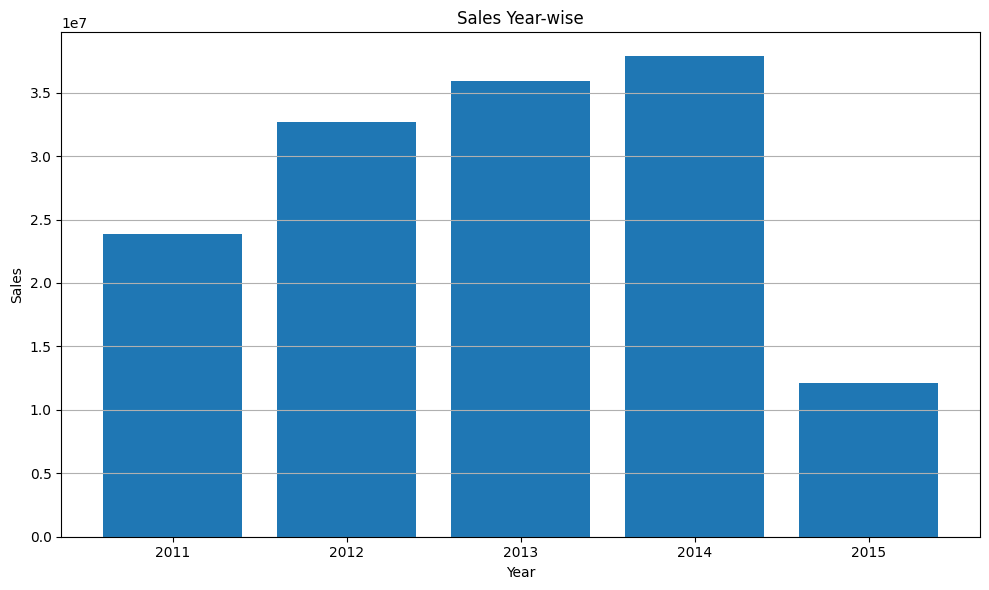

In [15]:
import matplotlib.pyplot as plt


# Extract the year from the 'date' column
train_data['year'] = pd.to_datetime(train_data['date']).dt.year

# Group by year and sum the sales
yearly_sales = train_data.groupby('year')['sales'].sum().reset_index()

# Plotting sales year-wise
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['year'], yearly_sales['sales'])
plt.title('Sales Year-wise')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.xticks(yearly_sales['year'])
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
# Extract the year from the 'date' column
train_data['year'] = pd.to_datetime(train_data['date']).dt.year

# Group by year and sum the sales
yearly_sales = train_data.groupby('year')['sales'].sum().reset_index()

# Display the yearly sales as a DataFrame
print(yearly_sales)


   year        sales
0  2011  23891336.08
1  2012  32649200.84
2  2013  35923373.31
3  2014  37861913.19
4  2015  12086553.49


/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_22298/2952962486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['year'] = pd.to_datetime(train_data['date']).dt.year


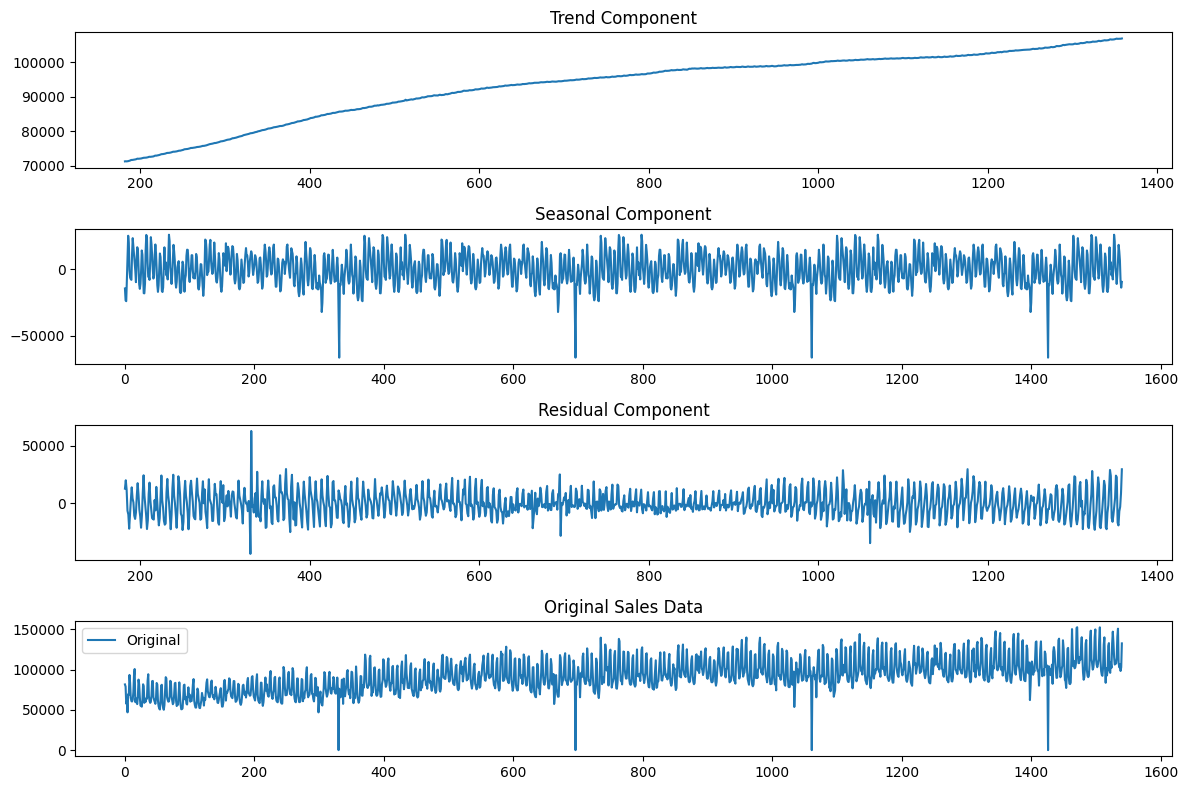

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose daily_sales into trend, seasonal, and residual components
result = seasonal_decompose(train_data['sales'], model='additive', period=365)  # Adjust the period as needed

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.trend)
plt.title('Trend Component')
plt.subplot(412)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(result.resid)
plt.title('Residual Component')
plt.subplot(414)
plt.plot(train_data['sales'], label='Original')
plt.legend()
plt.title('Original Sales Data')
plt.tight_layout()
plt.show()


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily_sales into trend, seasonal, and residual components
result = seasonal_decompose(train_data['sales'], model='additive', period=365)  # Adjust the period as needed

# Access numerical values
trend_component = result.trend
seasonal_component = result.seasonal
residual_component = result.resid

# You can print or inspect these components as needed
print("Trend Component:")
print(trend_component)
print("\nSeasonal Component:")
print(seasonal_component)
print("\nResidual Component:")
print(residual_component)


Trend Component:
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1536   NaN
1537   NaN
1538   NaN
1539   NaN
1540   NaN
Name: trend, Length: 1541, dtype: float64

Seasonal Component:
0      -14376.630145
1      -23345.444246
2      -23898.000200
3       -7817.925835
4       10484.393681
            ...     
1536    13469.639370
1537     6668.786896
1538    -8880.074712
1539   -13730.354949
1540    -9440.757862
Name: seasonal, Length: 1541, dtype: float64

Residual Component:
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1536   NaN
1537   NaN
1538   NaN
1539   NaN
1540   NaN
Name: resid, Length: 1541, dtype: float64


<Figure size 1200x400 with 0 Axes>

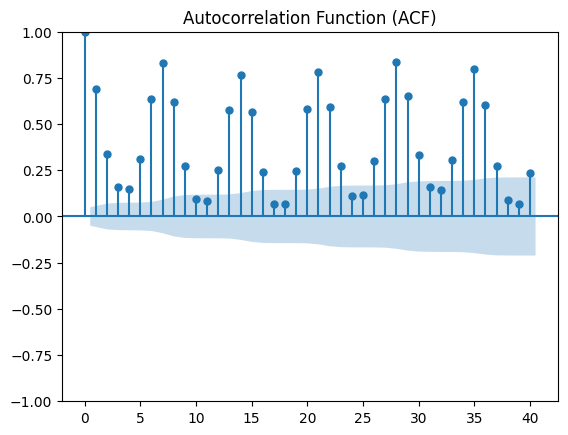

<Figure size 1200x400 with 0 Axes>

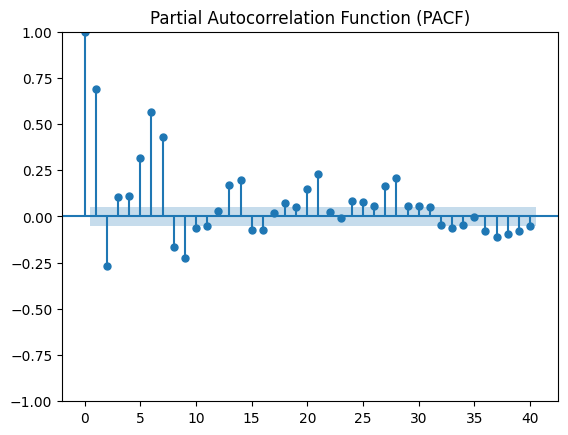

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(12, 4))
plot_acf(train_data['sales'], lags=40)
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.figure(figsize=(12, 4))
plot_pacf(train_data['sales'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()


In [34]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate autocorrelation and partial autocorrelation
lag = 40  # Number of lags to calculate
autocorrelation = acf(train_data['sales'], nlags=lag)
partial_autocorrelation = pacf(train_data['sales'], nlags=lag)

# Print the calculated values
print("Autocorrelation Function (ACF):")
print(autocorrelation)

print("\nPartial Autocorrelation Function (PACF):")
print(partial_autocorrelation)


Autocorrelation Function (ACF):
[1.         0.69202937 0.33806609 0.16007392 0.14813854 0.30865824
 0.6353733  0.83014382 0.61818821 0.27493509 0.09429676 0.08109201
 0.25328712 0.57832761 0.7671534  0.56681213 0.23946189 0.06514759
 0.06915994 0.24787872 0.57902213 0.78027654 0.59384878 0.2717558
 0.10972454 0.11838297 0.29805968 0.6359627  0.83802835 0.6508217
 0.33271592 0.15997689 0.14203931 0.3036525  0.61756811 0.79687437
 0.60274379 0.27273576 0.08686626 0.06834413 0.23306634]

Partial Autocorrelation Function (PACF):
[ 1.          0.69247874 -0.2709484   0.10386834  0.11233177  0.31775906
  0.56866371  0.43783666 -0.16143058 -0.23075417 -0.06512701 -0.05288234
  0.03345035  0.17416411  0.20753739 -0.07439423 -0.07963137  0.01461776
  0.07368024  0.05790018  0.15921521  0.24041468  0.03038798 -0.01516145
  0.07761234  0.08038813  0.06387091  0.18147848  0.23487681  0.07106212
  0.06014413  0.05339795 -0.04468046 -0.0607876  -0.0375551   0.01025407
 -0.07321857 -0.11913067 -0.109

/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_22298/1611493943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sales_diff'] = train_data['sales'] - train_data['sales'].shift(1)


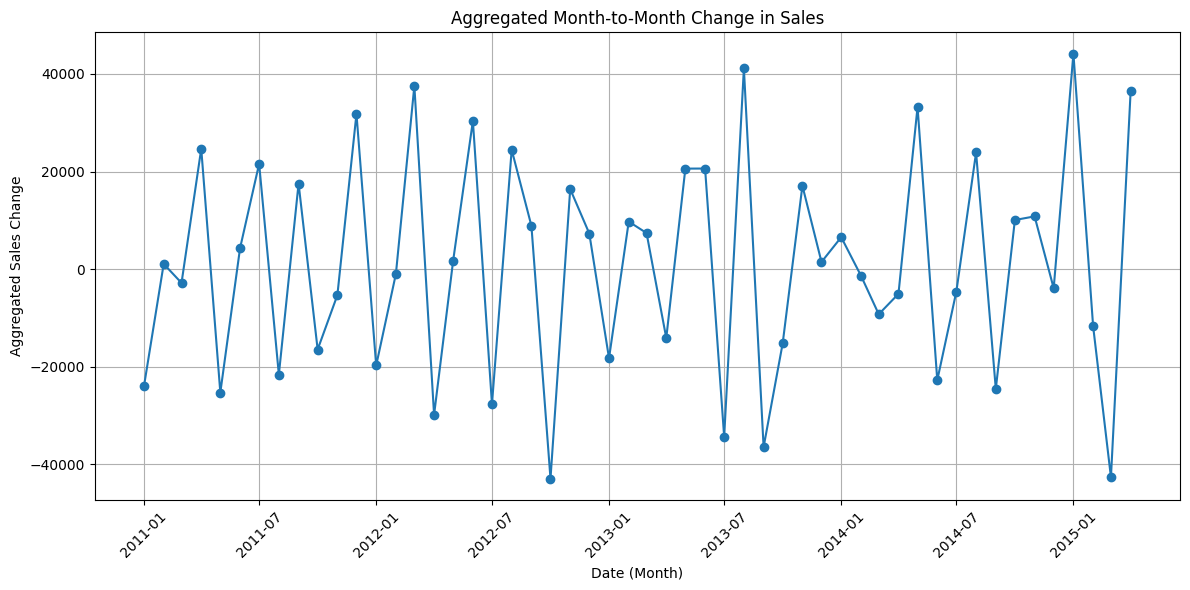

In [35]:
# Calculate month-to-month changes in sales
train_data['sales_diff'] = train_data['sales'] - train_data['sales'].shift(1)

# Group by month and sum the month-to-month changes in sales
monthly_sales_diff = train_data.groupby(pd.to_datetime(train_data['date']).dt.to_period('M'))['sales_diff'].sum()

# Plotting the aggregated month-to-month change in sales as a line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_diff.index.to_timestamp(), monthly_sales_diff.values, marker='o', linestyle='-')
plt.title('Aggregated Month-to-Month Change in Sales')
plt.xlabel('Date (Month)')
plt.ylabel('Aggregated Sales Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
# Calculate month-to-month changes in sales
train_data['sales_diff'] = train_data['sales'] - train_data['sales'].shift(1)

# Group by month and sum the month-to-month changes in sales
monthly_sales_diff = train_data.groupby(pd.to_datetime(train_data['date']).dt.to_period('M'))['sales_diff'].sum()

# Display the aggregated month-to-month changes in sales as a DataFrame
print(monthly_sales_diff)


date
2011-01   -23943.70
2011-02     1087.75
2011-03    -2813.18
2011-04    24667.31
2011-05   -25267.43
2011-06     4297.44
2011-07    21595.96
2011-08   -21602.57
2011-09    17545.18
2011-10   -16445.66
2011-11    -5309.49
2011-12    31835.26
2012-01   -19712.36
2012-02     -951.84
2012-03    37560.14
2012-04   -29832.08
2012-05     1760.08
2012-06    30369.93
2012-07   -27639.02
2012-08    24473.05
2012-09     8894.80
2012-10   -42918.39
2012-11    16416.84
2012-12     7316.81
2013-01   -18233.93
2013-02     9755.68
2013-03     7410.81
2013-04   -14097.30
2013-05    20608.54
2013-06    20625.78
2013-07   -34330.20
2013-08    41134.20
2013-09   -36434.18
2013-10   -15174.38
2013-11    17096.73
2013-12     1481.40
2014-01     6560.73
2014-02    -1307.25
2014-03    -9221.52
2014-04    -5041.56
2014-05    33245.01
2014-06   -22738.40
2014-07    -4568.19
2014-08    23910.21
2014-09   -24522.98
2014-10    10077.83
2014-11    10825.42
2014-12    -3899.63
2015-01    44171.70
2015-02   -1169

/var/folders/dm/ly88h28j28b8nml3dg1my5bc0000gn/T/ipykernel_22298/4108602802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sales_diff'] = train_data['sales'] - train_data['sales'].shift(1)


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline

class SARIMAXTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, order, seasonal_order, trend):
        self.order = order
        self.seasonal_order = seasonal_order
        self.trend = trend

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Fit SARIMA model and make predictions
        model = SARIMAX(X, order=self.order, seasonal_order=self.seasonal_order, trend=self.trend, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=7)  # Forecast next 7 days

        return forecast

# Use the SARIMA parameters from your grid search
best_sarima_params = [(2, 1, 2), (0, 0, 0, 0), 't']  # Replace with your best parameters

# Create and train the SARIMA pipeline
sarima_pipeline = Pipeline([
    ('sarimax', SARIMAXTransformer(order=best_sarima_params[0], seasonal_order=best_sarima_params[1], trend=best_sarima_params[2]))
])

sarima_pipeline.fit(train_data['sales'])


Pipeline(steps=[('sarimax',
                 SARIMAXTransformer(order=(2, 1, 2),
                                    seasonal_order=(0, 0, 0, 0), trend='t'))])

In [10]:
model_filename= "../models/forecasting/sarima_pipeline.joblib"


In [11]:
joblib.dump(sarima_pipeline, model_filename)


['../models/forecasting/sarima_pipeline.joblib']

In [67]:
import os
import joblib
from statsmodels.tsa.arima.model import ARIMA

loaded_model = joblib.load(model_filename)

In [68]:
# Specify your desired input date

daily_revenue = pd.read_csv('https://raw.githubusercontent.com/kirandas-dev/data-ML/main/combined_time_series.csv', low_memory=False)

# Convert the 'date' column in your DataFrame to Timestamp objects
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])


input_date = pd.to_datetime('2015-01-30')

# Create a DataFrame up to the input date
historical_data_up_to_input_date = daily_revenue[daily_revenue['date'] <= input_date]

# Use the loaded pipeline to transform the data
sales_forecast = loaded_model.transform(historical_data_up_to_input_date['sales'])

# Print the forecasted sales for the next 7 days
print("Predicted sales for the next 7 days starting from", input_date)
print(sales_forecast)

Predicted sales for the next 7 days starting from 2015-01-30 00:00:00
1463    118966.404300
1464    111497.094981
1465     97802.032616
1466     88382.028578
1467     89140.297042
1468     97988.623383
1469    107535.962674
Name: predicted_mean, dtype: float64
